# Exercises for probability polytopes


In [4]:
import os
from pathlib import Path

from itertools import product
from math import floor

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## Probability polytopes exercise: probability simplex

* Describe in words and mathematical notation what the method `fake_data_for_learning.utils.get_simplex_sample` does. Difficulty: *

* Test if the method `fake_data_for_learning.utils.get_simplex_sample` generates uniformly distributed samples from the probability simplex. Difficulty: **

* Test if projecting samples to individual coordinate axes is uniformly distributed. Difficulty: **

Answer the same questions for the following two versions. Be sure to consider more than one choice of ambient dimension.

### First task
First, function samples random vector of size $n$ from random uniform distribution on $[0,1]^n$ and then divides the vector by its sum, obtaining a vector which sums up to 1.

In [5]:
def get_simplex_sample_v1(ambient_dimension):
    """
    Get random element of the simplex of given ambient dimension

    Parameters
    ----------
    ambient_dimension : int

    Returns
    -------
    res : np.array
    """

    res = np.random.uniform(size=ambient_dimension)
    res = res / res.sum()

    return res


def get_simplex_sample_v2(ambient_dimension):
    """
    Get random element of the probability simplex

    Parameters
    ----------
    ambient_dimension : int

    Returns
    -------
    res : np.array
    """

    res = np.random.uniform(size=ambient_dimension-1)
    res = np.sort(res)
    res = np.insert(res, 0, 0)
    res = np.append(res, 1)
    res = np.diff(res)
    
    return res

(array([ 994.,  972., 1002.,  976., 1035., 1017., 1073.,  969.,  988.,
         974.]),
 array([1.18725636e-08, 2.00196729e-05, 4.00274732e-05, 6.00352735e-05,
        8.00430738e-05, 1.00050874e-04, 1.20058674e-04, 1.40066475e-04,
        1.60074275e-04, 1.80082075e-04, 2.00089876e-04]),
 <BarContainer object of 10 artists>)

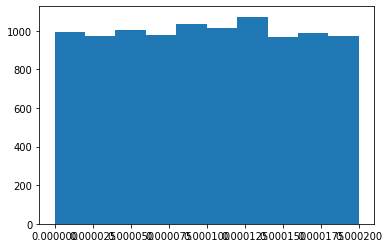

In [9]:
result = get_simplex_sample_v1(10000)
plt.hist(result)

(array([29., 20., 12., 14.,  6.,  8.,  5.,  1.,  2.,  3.]),
 array([8.60958028e-06, 3.65247988e-03, 7.29635018e-03, 1.09402205e-02,
        1.45840908e-02, 1.82279611e-02, 2.18718314e-02, 2.55157017e-02,
        2.91595720e-02, 3.28034423e-02, 3.64473126e-02]),
 <BarContainer object of 10 artists>)

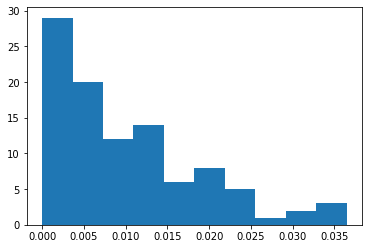

In [37]:
result = pd.DataFrame()
for i in range(100):
    result[i] = get_simplex_sample_v2(100)

plt.hist(result[3])